## Observations and Insights 

In [419]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [420]:
# Checking the number of mice.
TotalMice = merge_df['Mouse ID'].value_counts()
TotalMice


g989    13
q787    10
w914    10
l725    10
p438    10
        ..
t573     1
f932     1
d133     1
l872     1
n482     1
Name: Mouse ID, Length: 249, dtype: int64

In [421]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = merge_df[merge_df.duplicated(['Mouse ID','Timepoint'])]




In [422]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [423]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df['Mouse ID'] != 'g989']


In [424]:
# Checking the number of mice in the clean DataFrame.
len(clean_df)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [425]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_tumor_groups = clean_df.groupby('Drug Regimen')

mean = drug_tumor_groups['Tumor Volume (mm3)'].mean()
median = drug_tumor_groups['Tumor Volume (mm3)'].median()
stdev = drug_tumor_groups['Tumor Volume (mm3)'].std()
var = drug_tumor_groups['Tumor Volume (mm3)'].var()
sem = drug_tumor_groups['Tumor Volume (mm3)'].sem()


summary_df = pd.DataFrame({'Mean': mean,'Median': median,'Variance': var,'Stdev': stdev,'SEM': sem})

summary_df






,Mean,Median,Variance,Stdev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [426]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_table = clean_df.groupby('Drug Regimen').aggregate({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
summary_table



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

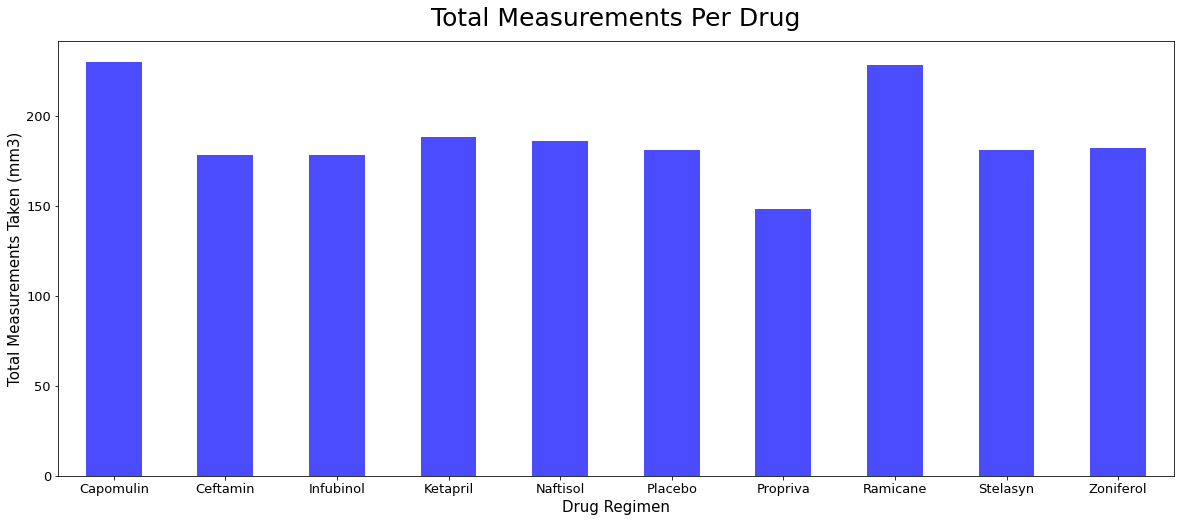

In [427]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.


summary_table = clean_df.groupby('Drug Regimen').aggregate({'Tumor Volume (mm3)':['count']})

pandas_bar = summary_table.plot(kind="bar",figsize=(20,8), color="blue", alpha=.7, rot=0, fontsize=13, legend=False)

pandas_bar.set_ylabel('Total Measurements Taken (mm3)',fontdict={'fontsize':15})
pandas_bar.set_title("Total Measurements Per Drug", pad=15,fontdict={'fontsize':25})
pandas_bar.set_xlabel('Drug Regimen',fontdict={'fontsize':15})





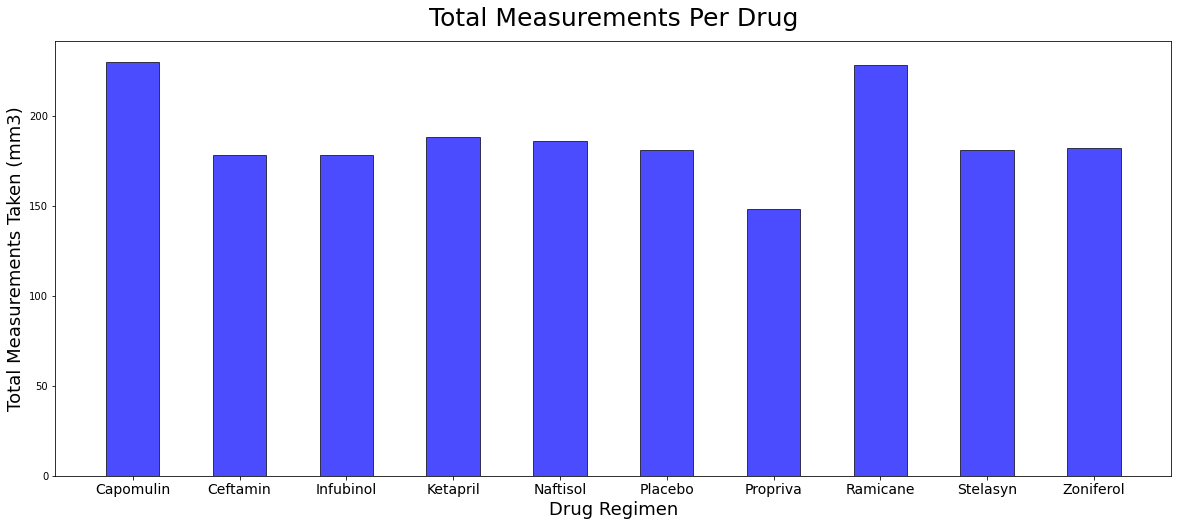

In [428]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
pyplot_bar = summary_table['Tumor Volume (mm3)']
x_axis = pyplot_bar.index
y_axis = pyplot_bar['count']


plt.figure(figsize=(20,8))
plt.title("Total Measurements Per Drug", fontsize=25, pad=15)
plt.xlabel("Drug Regimen", fontsize=18)
plt.ylabel("Total Measurements Taken (mm3)", fontsize=18)
plt.rc('xtick', labelsize=14)
plt.bar(x_axis, y_axis, width=.5, edgecolor="black", color='b', alpha=.7)
plt.show()




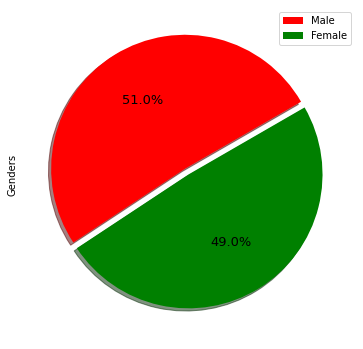

In [429]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_counts = clean_df['Sex'].value_counts()

genders = {'Genders': gender_counts}
genderdf = pd.DataFrame(genders)

explode = (.05,0)
textprops = {"fontsize":13}
colors = ["red","green"]
labels = ['Males', 'Females']

pandas_pie = genderdf.plot(kind="pie", y='Genders', figsize=(6,8), autopct="%1.1f%%", labels=None, 
            textprops=textprops, explode=explode, colors=colors, shadow=True, startangle=30)


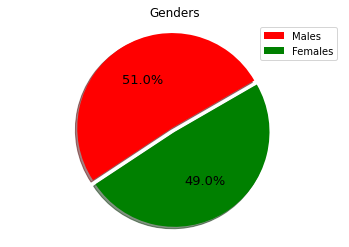

In [430]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Males = clean_df['Sex'].value_counts().Male
Females = clean_df['Sex'].value_counts().Female
x = [Males,Females]

plt.pie(x, labels=None, textprops=textprops, explode=explode, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=30)
plt.axis("equal")
plt.legend(labels)
plt.title("Genders")

plt.show()



## Quartiles, Outliers and Boxplots

In [431]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


grouped_drugs = clean_df[clean_df['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
mouse_groups = grouped_drugs.groupby(['Mouse ID'])
final_volume = mouse_groups[['Drug Regimen','Timepoint','Tumor Volume (mm3)']].max()

final_volume


,Drug Regimen,Timepoint,Tumor Volume (mm3)
Mouse ID,,,
a203,Infubinol,45,67.973419
a251,Infubinol,45,65.525743
a275,Ceftamin,45,62.999356
a411,Ramicane,45,45.466677
a444,Ramicane,45,45.000000
...,...,...,...
y769,Ceftamin,45,68.594745
y793,Capomulin,45,45.000000
y865,Ceftamin,45,64.729837


In [432]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for vol in final_volume['Tumor Volume (mm3)']:
    tumor_vol_data.append(vol)

tumor_vol_data.sort()

final_volume_sorted = final_volume.sort_values('Tumor Volume (mm3)')

quantiles = final_volume_sorted['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quantiles[.25]
upperq = quantiles[.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

pot_outliers = []
pot_outliers_cap = []
pot_outliers_ram = []
pot_outliers_inf = []
pot_outliers_cef = []

for value in final_volume_sorted['Tumor Volume (mm3)']:
    if value < lower_bound or value > upper_bound:
        pot_outliers.append(value)
              
print(f'{treatments} treatments group contains {len(pot_outliers)} potential outliers')
    
# Locate the rows which contain mice on each drug and get the tumor volumes
cap = final_volume.loc[final_volume['Drug Regimen'] == 'Capomulin']
ram = final_volume.loc[final_volume['Drug Regimen'] == 'Ramicane']
inf = final_volume.loc[final_volume['Drug Regimen'] == 'Infubinol']
cef = final_volume.loc[final_volume['Drug Regimen'] == 'Ceftamin']
    
# add subset 
    
    
# Determine outliers using upper and lower bounds

#Capomulin stats
cap = cap.sort_values(['Tumor Volume (mm3)'])
cap_tumor = cap['Tumor Volume (mm3)']
cap_tumor

quantiles = cap_tumor.quantile([.25,.5,.75])
lowerq_cap = quantiles[.25]
upperq_cap = quantiles[.75]
iqr_cap = upperq_cap-lowerq_cap

lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)

#Ramicane stats
ram = ram.sort_values(['Tumor Volume (mm3)'])
ram_tumor = ram['Tumor Volume (mm3)']

quantiles = ram_tumor.quantile([.25,.5,.75])
lowerq_ram = quantiles[.25]
upperq_ram = quantiles[.75]
iqr_ram = upperq_ram-lowerq_ram

lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)

#Infubinol stats
inf = inf.sort_values(['Tumor Volume (mm3)'])
inf_tumor = inf['Tumor Volume (mm3)']

quantiles = inf_tumor.quantile([.25,.5,.75])
lowerq_inf = quantiles[.25]
upperq_inf = quantiles[.75]
iqr_inf = upperq_inf-lowerq_inf

lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)

#Ceftamin stats
cef = cef.sort_values(['Tumor Volume (mm3)'])
cef_tumor = cef['Tumor Volume (mm3)']

quantiles = cef_tumor.quantile([.25,.5,.75])
lowerq_cef = quantiles[.25]
upperq_cef = quantiles[.75]
iqr_cef = upperq_cef-lowerq_cef

lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)

for value in cap_tumor:
    if value < lower_bound or value > upper_bound:
        pot_outliers_cap.append(value)
        
for value in ram_tumor:
    if value < lower_bound or value > upper_bound:
        pot_outliers_ram.append(value)
        
for value in inf_tumor:
    if value < lower_bound or value > upper_bound:
        pot_outliers_inf.append(value)
        
for value in cef_tumor:
    if value < lower_bound or value > upper_bound:
        pot_outliers_cef.append(value)
print(f'Capomulin treatment group contains {len(pot_outliers_cap)} potential outliers.')
print(f'Ramicane treatment group contains {len(pot_outliers_ram)} potential outliers.')
print(f'Infubinol treatment group contains {len(pot_outliers_inf)} potential outliers.')
print(f'Ceftamin treatment group contains {len(pot_outliers_cef)} potential outliers.')

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] treatments group contains 0 potential outliers
Capomulin treatment group contains 0 potential outliers.
Ramicane treatment group contains 0 potential outliers.
Infubinol treatment group contains 0 potential outliers.
Ceftamin treatment group contains 0 potential outliers.


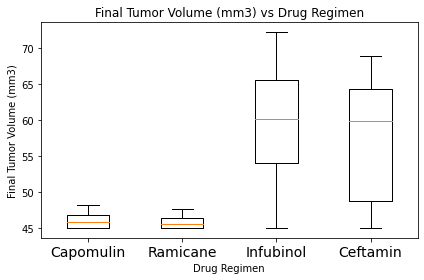

In [433]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [cap_tumor,ram_tumor,inf_tumor,cef_tumor]

fig, ax = plt.subplots()
ax.set_title("Final Tumor Volume (mm3) vs Drug Regimen")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Final Tumor Volume (mm3)")
# ax.set_ylim(20,80)

ax.boxplot(data, labels=['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.tight_layout()
plt.show()



## Line and Scatter Plots

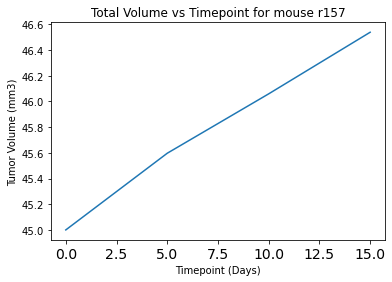

In [434]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mice = clean_df[clean_df['Drug Regimen'].isin(['Capomulin'])]
line_mouse = cap_mice.loc[cap_mice['Mouse ID'] == 'r157',:]

cap_tp = line_mouse['Timepoint']
cap_vol = line_mouse['Tumor Volume (mm3)']

plt.title('Total Volume vs Timepoint for mouse r157')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.plot(cap_tp, cap_vol)
plt.show()

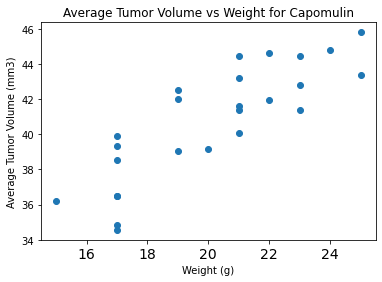

In [440]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_vol = cap_mice.groupby(['Mouse ID']).mean()

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs Weight for Capomulin')

plt.scatter(avg_vol['Weight (g)'], avg_vol['Tumor Volume (mm3)'])
plt.show()

## Correlation and Regression

In [449]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight = avg_vol['Weight (g)']
avg_volume = avg_vol['Tumor Volume (mm3)']
                     
correlation = round(st.pearsonr(weight, avg_volume)[0],2)
print(f'The correlation for mouse weight vs average tumor voluome is {correlation}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The linear regression equation for mouse weight vs average tumor volume is {line_eq}')


The correlation for mouse weight vs average tumor voluome is 0.84
The linear regression equation for mouse weight vs average tumor volume is y = 0.95x + 21.55
